In [ ]:
import os
import sys
import shutil
import dotenv
from   dotenv import find_dotenv, load_dotenv
import matplotlib
load_dotenv(find_dotenv())
PATH_P     = os.environ['PATH_P']
os.chdir(PATH_P)
sys.path.insert(0, PATH_P)
import pandas as pd
from src.dst.outputhandler.pickle import tic,toc,pickle_save_,pickle_load
from src.dst.plots.plots import plotting_tool,retrieve_data,SeabornFig2Grid
from src.visualization.vis_LSTM_p.main import main_visualize
import  numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from src.visualization.vis_LSTM_p.main import main_visualize
from src.models.CMA_ES.CMA_ES import CMA_ES

## experiments

In [ ]:
path                                  =  './models/segmentated_shuffle/bayes_opt/DEEP2/'
RD                                    = retrieve_data()
data,dict_,path_best,hist             = RD.get_best_D1(path)
data['df_t_val_train']                = pd.concat([data['df_t_train'],data['df_t_val']])
AUC_v_a                               = RD.get_all(path,'AUC_v')

val_loss_a                            = RD.get_all(path,'val_f')
dict_['AUC_v']                        = data['AUC_v']

RD.print_dict(dict_)

str_list                              = data['path_o'].split('/')
data['path_o']                        = path_best
BO_vis                                = plotting_tool(dict_)

In [4]:
def return_dict():
    dict_c = {
        'path_i'   : './models/bayes_opt/DEEP2/',
        'path_save': './models/CMA_ES/DEEP2/',

        'resolution_AUC': 1000,

        ###### CMA_ES    ######
        'CMA_ES': True,
        'verbose_CMA': 1,
        'verbose_CMA_log': 0,
        'evals': 21*150,
        'bounds': [-100., 100.],
        'sigma': 0.4222222222222225,
        'progress_ST': 0.3,
        'popsize'    : 21,
        
        'mode'       : 'linear',

        'epoch': 0

    }

    return dict_c

## Min plus linear

In [13]:
dict_c = return_dict()
dict_c['mode']   = 'linear'
dict_c['bounds'] = [-100,100]
path   = path_best.replace('bayes_opt','CMA_ES/min_pos_linear')
# CMA_ES(dict_c).main(data,path,dict_)

In [14]:
df    = pickle_load(path+'best/df.p', None)
data  = pickle_load(path+'best/data_best.p', None)
dict_ = pickle_load(path+'dict.p', None)

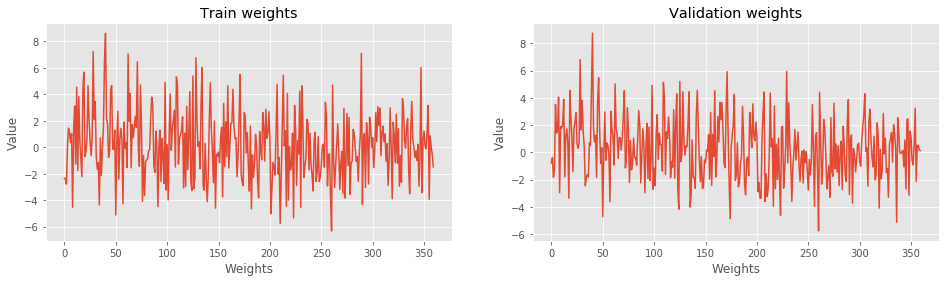

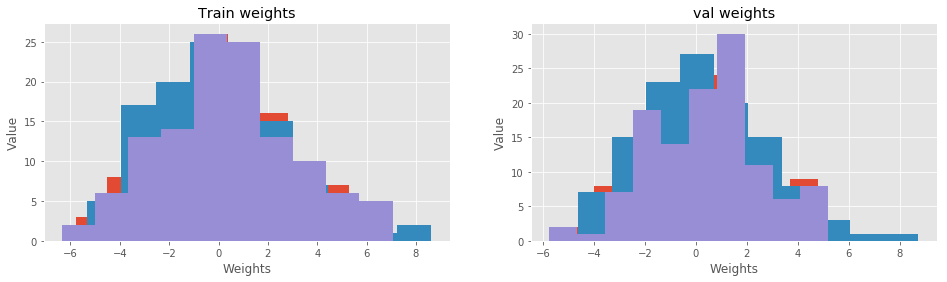

In [15]:
BO_vis.plot_weigths(data['x_tr'],data['x_v'])

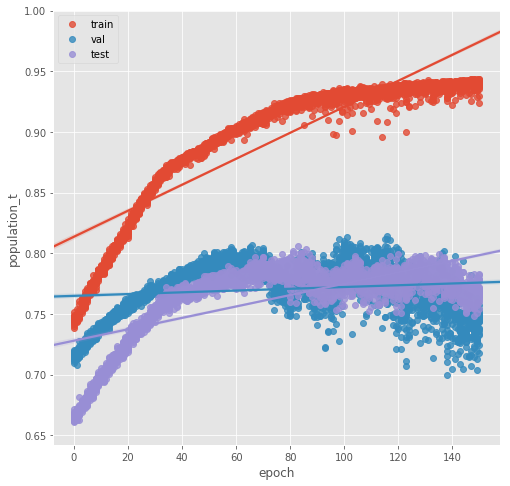

In [16]:
# Set up the figure
f, ax = plt.subplots(figsize=(8, 8))
ax = sns.regplot(df.epoch, df.population_tr,label = 'train')
ax = sns.regplot(df.epoch, df.population_v,label = 'val')
ax = sns.regplot(df.epoch, df.population_t,label = 'test')
plt.legend()

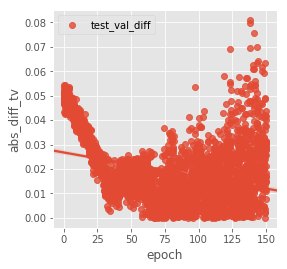

In [17]:
f, ax = plt.subplots(figsize=(4, 4))
ax = sns.regplot(df.epoch, df.abs_diff_tv,label = 'test_val_diff')
plt.legend()


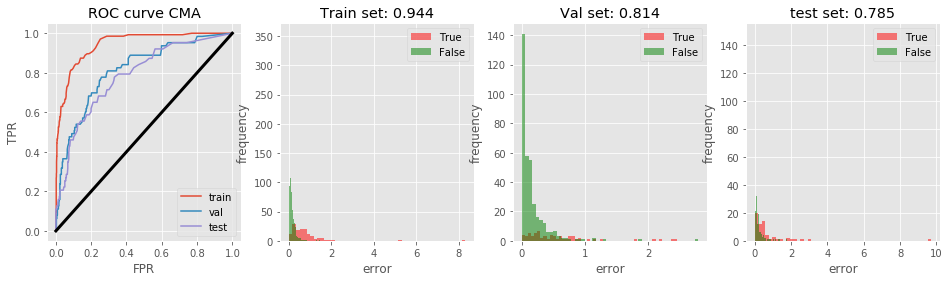

In [18]:
BO_vis.plot_cma(data)

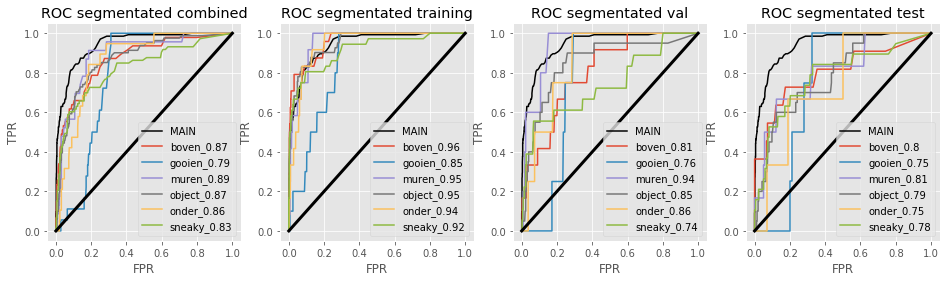

In [19]:
data['path_o'] = data['dict_config']['path_save']
BO_vis.save_ROC_segment(data,'segmentation',cma = True)

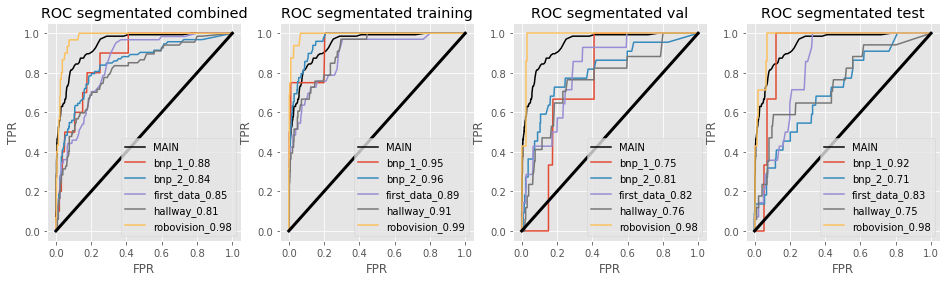

In [20]:
data['path_o'] = data['dict_config']['path_save']
BO_vis.save_ROC_segment(data,'location',cma = True)

## plus linear

In [21]:
dict_c = return_dict()
dict_c['mode']   = 'linear'
dict_c['bounds'] = [0,100]
path   = path_best.replace('bayes_opt','CMA_ES/pos_linear')
# CMA_ES(dict_c).main(data,path,dict_)

In [22]:
df    = pickle_load(path+'best/df.p', None)
data  = pickle_load(path+'best/data_best.p', None)
dict_ = pickle_load(path+'dict.p', None)

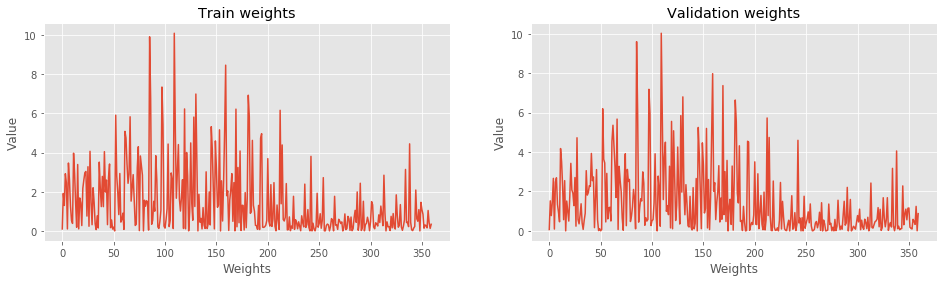

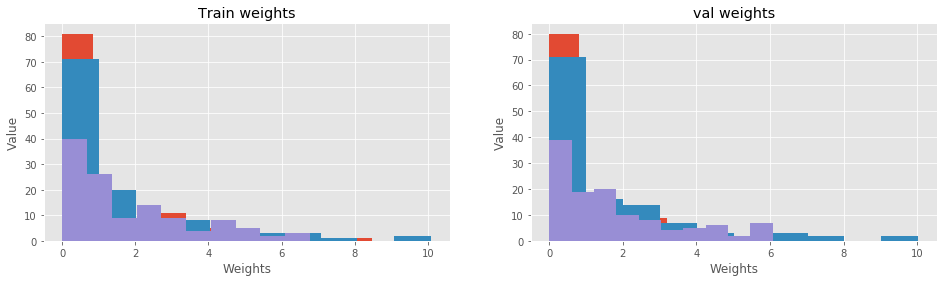

In [23]:
BO_vis.plot_weigths(data['x_tr'],data['x_v'])

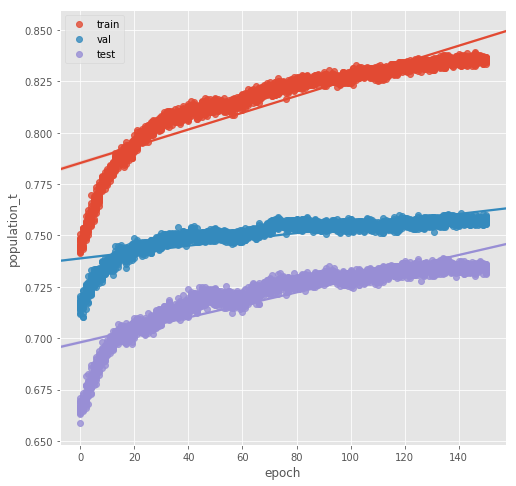

In [24]:
# Set up the figure
f, ax = plt.subplots(figsize=(8, 8))
ax = sns.regplot(df.epoch, df.population_tr,label = 'train')
ax = sns.regplot(df.epoch, df.population_v,label = 'val')
ax = sns.regplot(df.epoch, df.population_t,label = 'test')
plt.legend()

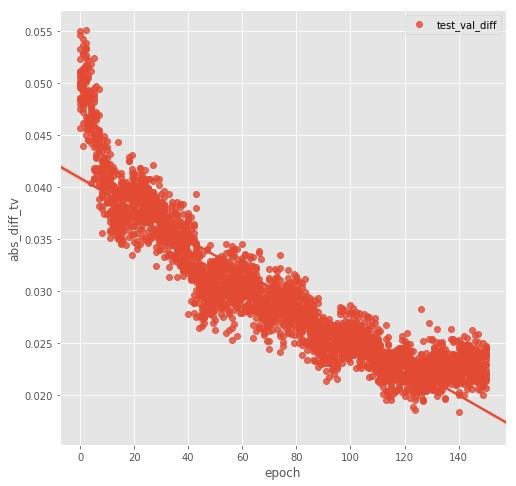

In [25]:
f, ax = plt.subplots(figsize=(8, 8))
ax = sns.regplot(df.epoch, df.abs_diff_tv,label = 'test_val_diff')
plt.legend()

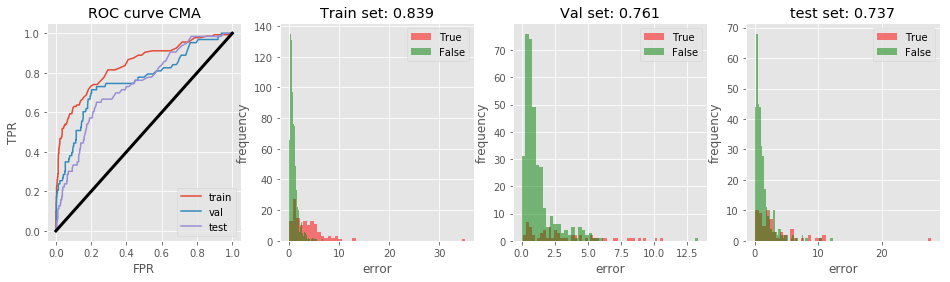

In [26]:
BO_vis.plot_cma(data)

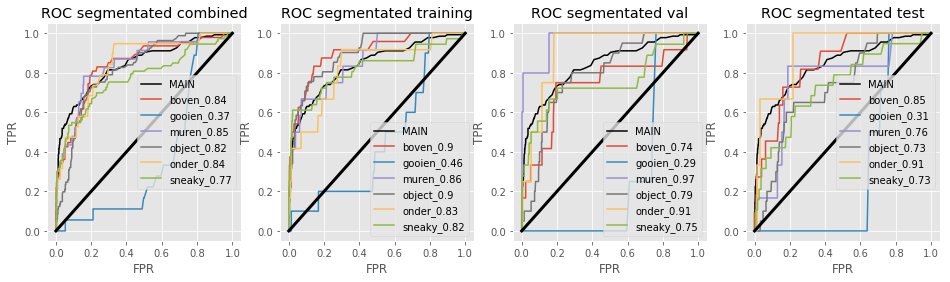

In [27]:
data['path_o'] = data['dict_config']['path_save']
BO_vis.save_ROC_segment(data,'segmentation',cma = True)

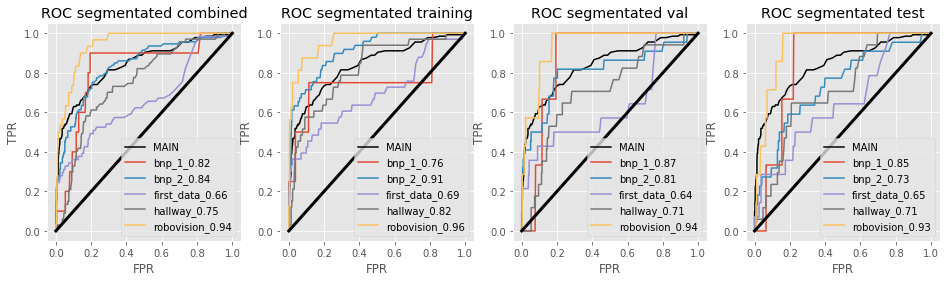

In [28]:
data['path_o'] = data['dict_config']['path_save']
BO_vis.save_ROC_segment(data,'location',cma = True)

## plus min sigmoid

In [29]:
dict_c = return_dict()
dict_c['mode']   = 'sigmoid'
dict_c['bounds'] = [-100,100]
path   = path_best.replace('bayes_opt','CMA_ES/pos_min_sigmoid')
# CMA_ES(dict_c).main(data,path,dict_)

In [30]:
df    = pickle_load(path+'best/df.p', None)
data  = pickle_load(path+'best/data_best.p', None)
dict_ = pickle_load(path+'dict.p', None)

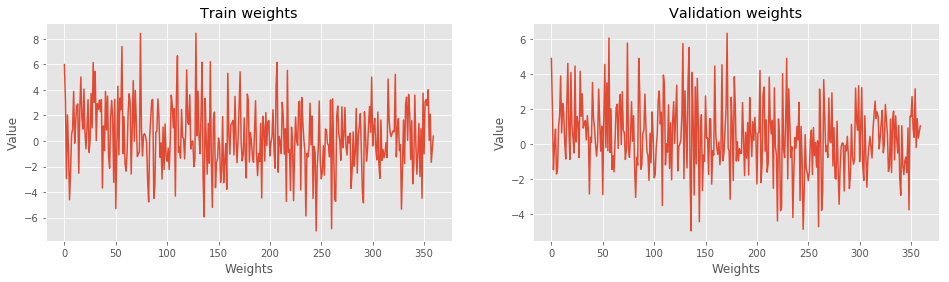

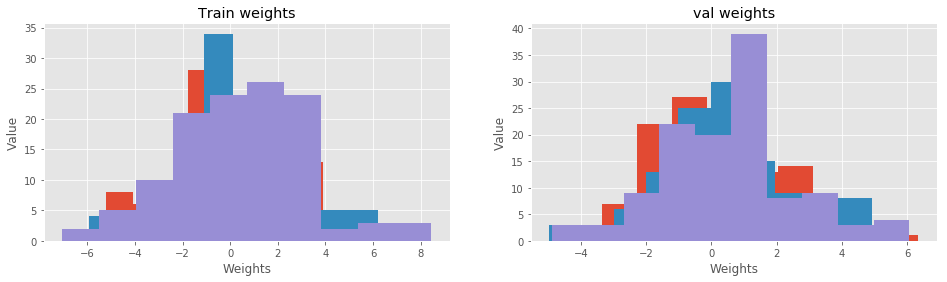

In [31]:
BO_vis.plot_weigths(data['x_tr'],data['x_v'])

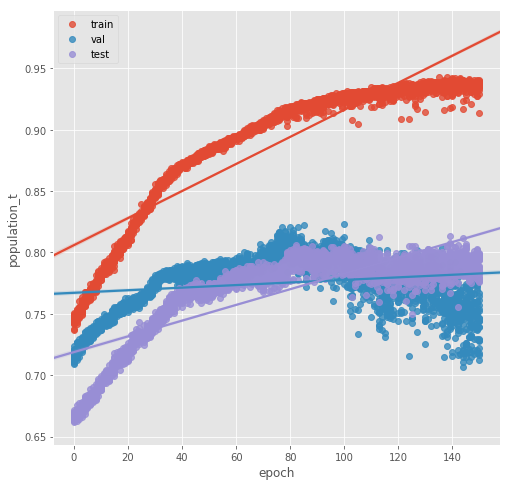

In [32]:
# Set up the figure
f, ax = plt.subplots(figsize=(8, 8))
ax = sns.regplot(df.epoch, df.population_tr,label = 'train')
ax = sns.regplot(df.epoch, df.population_v,label = 'val')
ax = sns.regplot(df.epoch, df.population_t,label = 'test')
plt.legend()

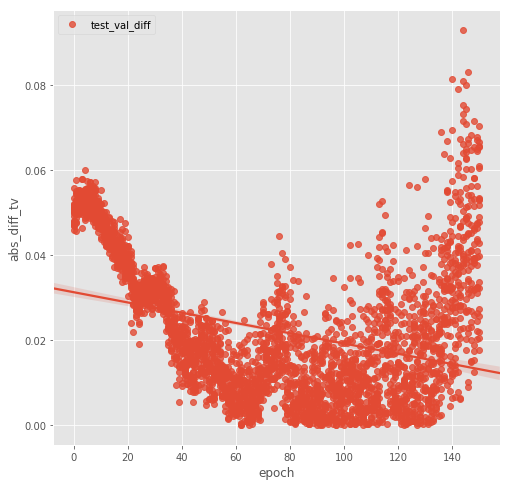

In [33]:
f, ax = plt.subplots(figsize=(8, 8))
ax = sns.regplot(df.epoch, df.abs_diff_tv,label = 'test_val_diff')
plt.legend()

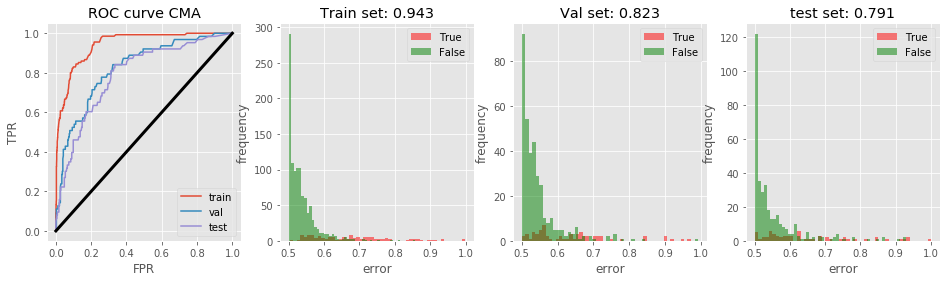

In [34]:
BO_vis.plot_cma(data)

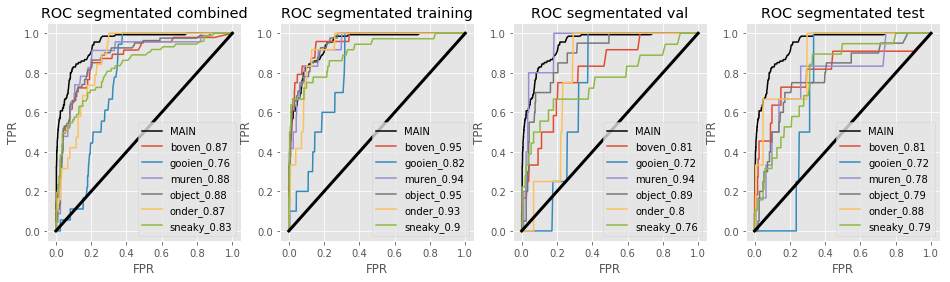

In [35]:
data['path_o'] = data['dict_config']['path_save']
BO_vis.save_ROC_segment(data,'segmentation',cma = True)

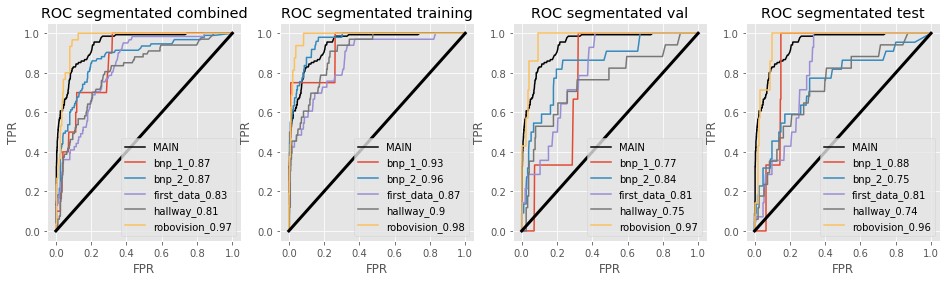

In [36]:
data['path_o'] = data['dict_config']['path_save']
BO_vis.save_ROC_segment(data,'location',cma = True)

## plus sigmoid

In [37]:
dict_c = return_dict()
dict_c['mode']   = 'sigmoid'
dict_c['bounds'] = [0,100]
path   = path_best.replace('bayes_opt','CMA_ES/pos_sigmoid')
# CMA_ES(dict_c).main(data,path,dict_)

In [38]:
df    = pickle_load(path+'best/df.p', None)
data  = pickle_load(path+'best/data_best.p', None)
dict_ = pickle_load(path+'dict.p', None)

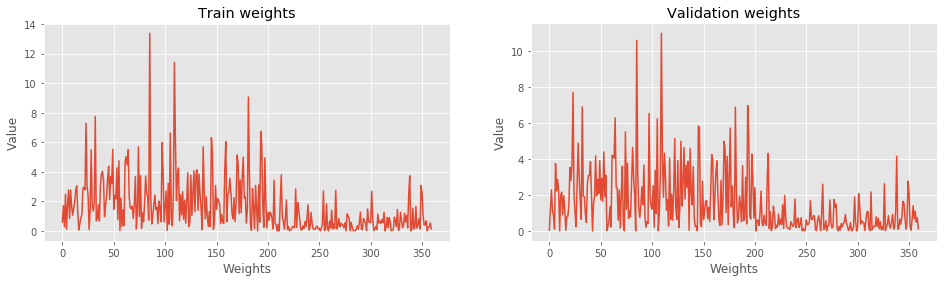

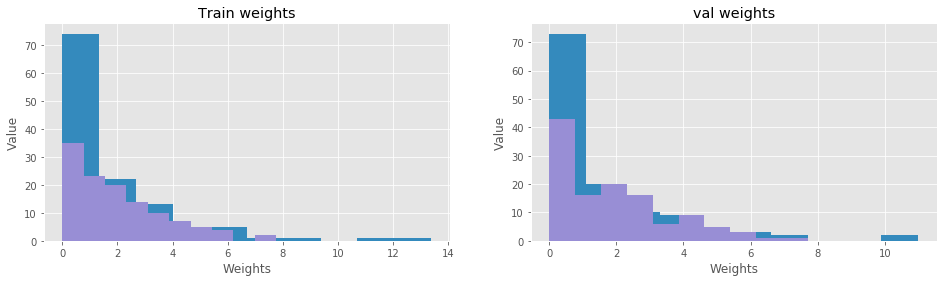

In [39]:
BO_vis.plot_weigths(data['x_tr'],data['x_v'])

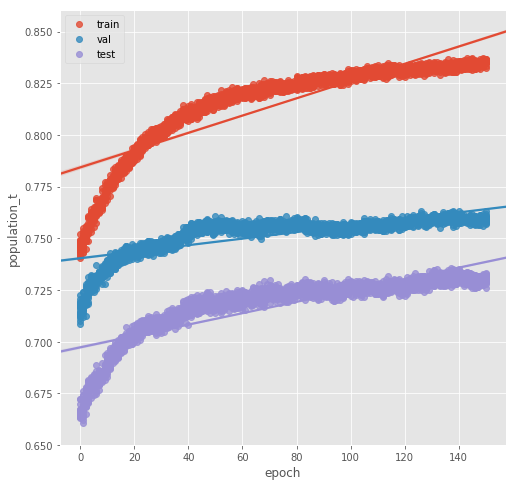

In [40]:
# Set up the figure
f, ax = plt.subplots(figsize=(8, 8))
ax = sns.regplot(df.epoch, df.population_tr,label = 'train')
ax = sns.regplot(df.epoch, df.population_v,label = 'val')
ax = sns.regplot(df.epoch, df.population_t,label = 'test')
plt.legend()

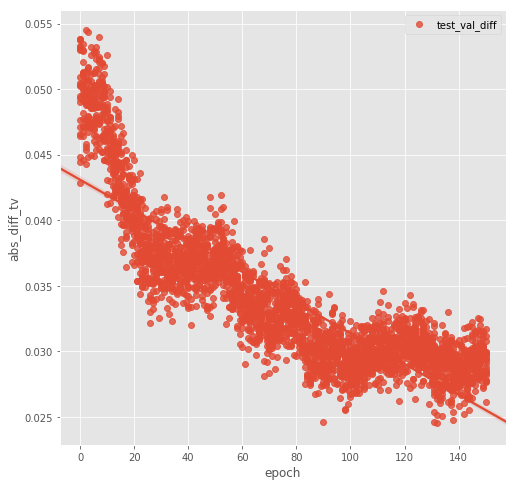

In [41]:
f, ax = plt.subplots(figsize=(8, 8))
ax = sns.regplot(df.epoch, df.abs_diff_tv,label = 'test_val_diff')
plt.legend()

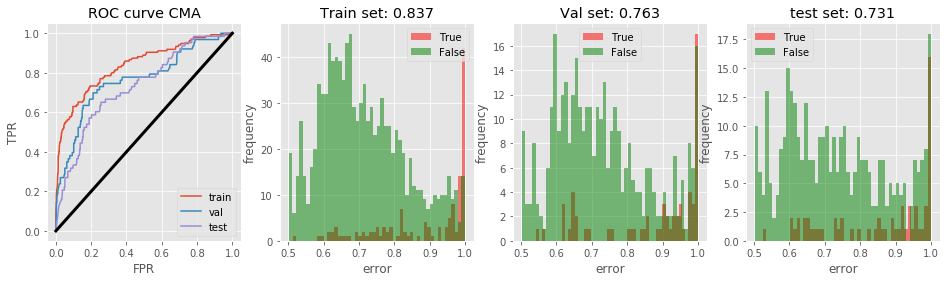

In [42]:
BO_vis.plot_cma(data)

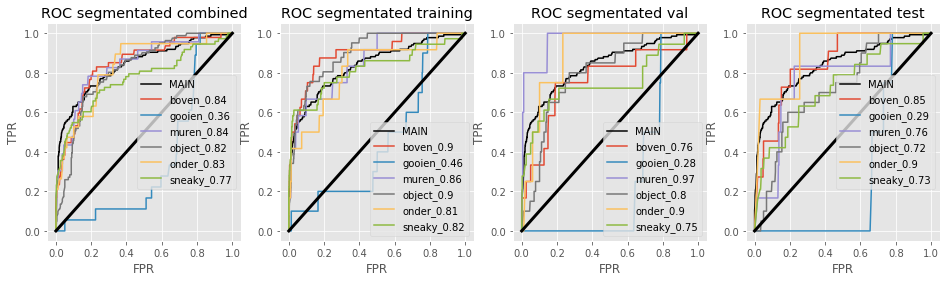

In [43]:
data['path_o'] = data['dict_config']['path_save']
BO_vis.save_ROC_segment(data,'segmentation',cma = True)

In [ ]:
data['path_o'] = data['dict_config']['path_save']
BO_vis.save_ROC_segment(data,'location',cma = True)

## plus leaky relu

In [ ]:
dict_c = return_dict()
dict_c['mode']   = 'leaky_relu'
dict_c['bounds'] = [0,100]
path   = path_best.replace('bayes_opt','CMA_ES/pos_leaky_relu')
CMA_ES(dict_c).main(data,path,dict_)

In [ ]:
df    = pickle_load(path+'best/df.p', None)
data  = pickle_load(path+'best/data_best.p', None)
dict_ = pickle_load(path+'dict.p', None)

In [ ]:
BO_vis.plot_weigths(data['x_tr'][360:],data['x_v'][360:])
BO_vis.plot_weigths(data['x_tr'][:360],data['x_v'][:360])

In [ ]:
# Set up the figure
f, ax = plt.subplots(figsize=(8, 8))
ax = sns.regplot(df.epoch, df.population_tr,label = 'train')
ax = sns.regplot(df.epoch, df.population_v,label = 'val')
ax = sns.regplot(df.epoch, df.population_t,label = 'test')
plt.legend()

In [ ]:
f, ax = plt.subplots(figsize=(8, 8))
ax = sns.regplot(df.epoch, df.abs_diff_tv,label = 'test_val_diff')
plt.legend()

In [ ]:
BO_vis.plot_cma(data)

In [ ]:
data['path_o'] = data['dict_config']['path_save']
BO_vis.save_ROC_segment(data,'segmentation',cma = True)

In [ ]:
data['path_o'] = data['dict_config']['path_save']
BO_vis.save_ROC_segment(data,'location',cma = True)

## plus min leaky relu

In [ ]:
dict_c = return_dict()
dict_c['mode']   = 'leaky_relu'
dict_c['bounds'] = [-100,100]
path   = path_best.replace('bayes_opt','CMA_ES/pos_min_leaky_relu')
CMA_ES(dict_c).main(data,path,dict_)

In [ ]:
df    = pickle_load(path+'best/df.p', None)
data  = pickle_load(path+'best/data_best.p', None)
dict_ = pickle_load(path+'dict.p', None)

In [ ]:
BO_vis.plot_weigths(data['x_tr'][360:],data['x_v'][360:])
BO_vis.plot_weigths(data['x_tr'][:360],data['x_v'][:360])

In [ ]:
# Set up the figure
f, ax = plt.subplots(figsize=(8, 8))
ax = sns.regplot(df.epoch, df.population_tr,label = 'train')
ax = sns.regplot(df.epoch, df.population_v,label = 'val')
ax = sns.regplot(df.epoch, df.population_t,label = 'test')
plt.legend()

In [ ]:
f, ax = plt.subplots(figsize=(8, 8))
ax = sns.regplot(df.epoch, df.abs_diff_tv,label = 'test_val_diff')
plt.legend()

In [ ]:
BO_vis.plot_cma(data)

In [ ]:
data['path_o'] = data['dict_config']['path_save']
BO_vis.save_ROC_segment(data,'segmentation',cma = True)

In [ ]:
data['path_o'] = data['dict_config']['path_save']
BO_vis.save_ROC_segment(data,'location',cma = True)

# DEEP2

In [ ]:
# path                                  =  './models/CMA_ES/DEEP2/'
# path_a                                = [path]
# RD                                    = retrieve_data()
# df,dict_,path_best                    = RD.get_max_CMA(path)


# BO_vis                                = plotting_tool(dict_['dict_config'])

# df                                     = df[df['epoch'] < 150]
# array_AUC_tr_a                         = RD.get_all_cma(path_a,'AUC_tr')
# array_AUC_v_a                          = RD.get_all_cma(path_a,'AUC_v')
# array_AUC_t_a                          = RD.get_all_cma(path_a,'AUC_t')

In [ ]:
fig = plt.figure(figsize=(16,4))

ax1 = plt.subplot(141)
ax1 = plt.hist(array_AUC_tr_a)

ax2 = plt.subplot(142)
ax2 = plt.hist(array_AUC_v_a)

ax3 = plt.subplot(143)
ax3 = plt.hist(array_AUC_t_a)


ax4 = plt.subplot(144)
ax4 = plt.plot(array_AUC_tr_a,label = 'train')
ax4 = plt.plot(array_AUC_v_a,label = 'val')
ax4 = plt.plot(array_AUC_t_a,label = 'test')
plt.legend()
plt.show()


In [ ]:
BO_vis.plot_weigths(dict_['x_tr'],dict_['x_v'])

In [ ]:
# Set up the figure
f, ax = plt.subplots(figsize=(8, 8))



ax = sns.regplot(df.epoch, df.population_tr,label = 'train')
ax = sns.regplot(df.epoch, df.population_v,label = 'val')
ax = sns.regplot(df.epoch, df.population_t,label = 'test')
plt.legend()
plt.savefig('./plots/pic/CMA_training')

In [ ]:
BO_vis.plot_cma(dict_)

In [ ]:
dict_['path_o'] = dict_['dict_config']['path_save']
BO_vis.save_ROC_segment(dict_,'segmentation',cma = True)

In [ ]:
dict_['path_o'] = dict_['dict_config']['path_save']
BO_vis.save_ROC_segment(dict_,'location',cma = True)

In [ ]:
dict_c = {
        'path'       :  path_best+'/',
        'mode'       : 'df_t_train',

        'path_dict'  : path_best+'/dict.p',

        'plot_mode'  : 'error'


}
vis = main_visualize(dict_c)
vis.play_videos()


In [ ]:
path_best+'/dict.p'